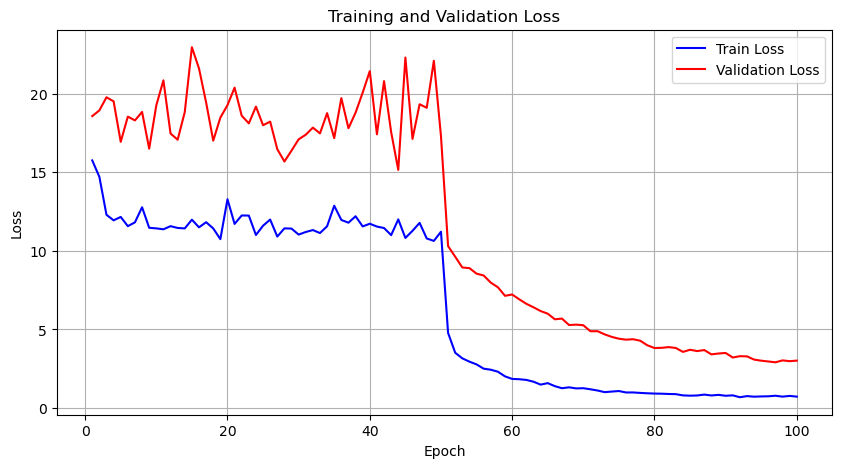

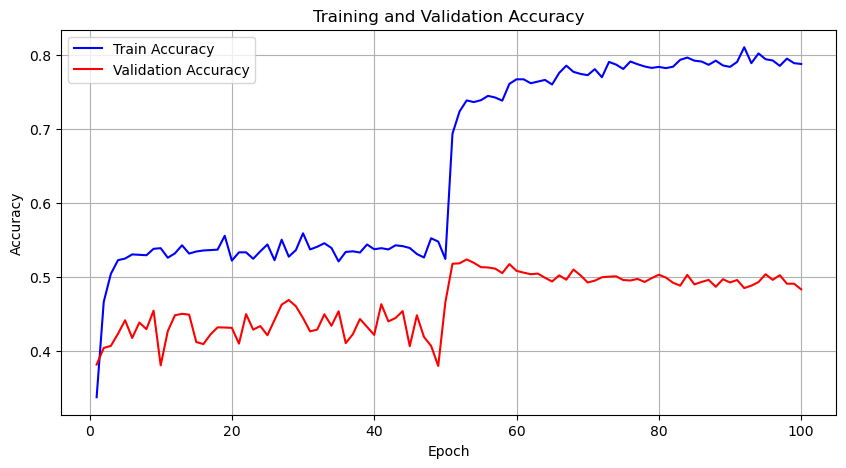

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
train_log = pd.read_csv("results/3dresnet50finetuning/train.log", sep="\t")

# Load validation log
val_log = pd.read_csv("results/3dresnet50finetuning/val.log", sep="\t")

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_log["epoch"], train_log["loss"], label="Train Loss", color='blue')
plt.plot(val_log["epoch"], val_log["loss"], label="Validation Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_log["epoch"], train_log["acc"], label="Train Accuracy", color='blue')
plt.plot(val_log["epoch"], val_log["acc"], label="Validation Accuracy", color='red')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


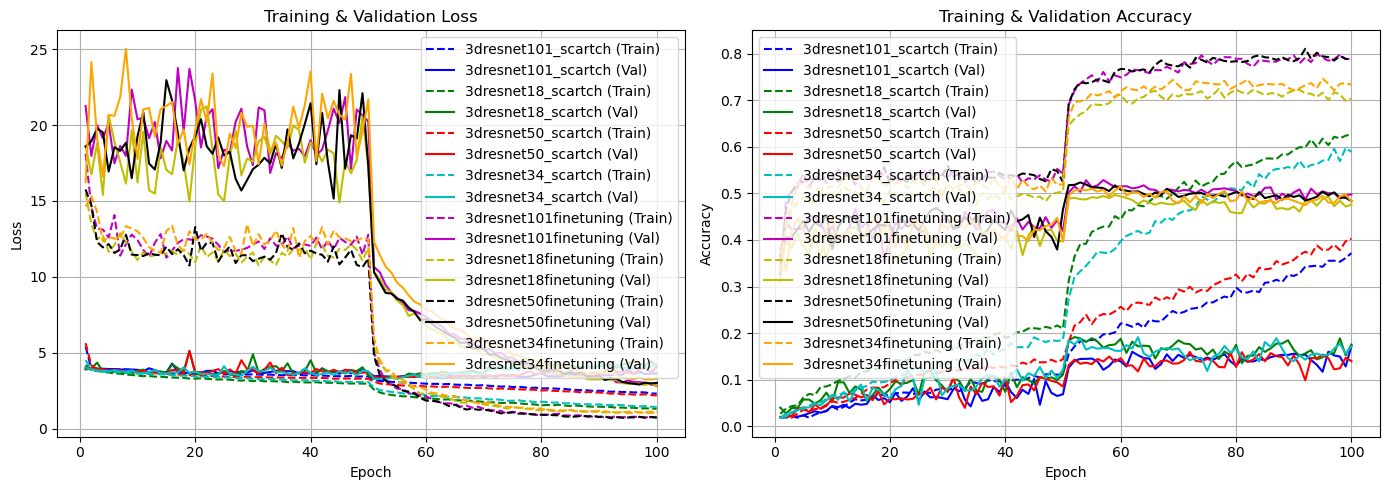

In [8]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Define model directories
model_dirs = [
    "results/3dresnet101_scartch", "results/3dresnet18_scartch",
    "results/3dresnet50_scartch", "results/3dresnet34_scartch",
    "results/3dresnet101finetuning", "results/3dresnet18finetuning",
    "results/3dresnet50finetuning", "results/3dresnet34finetuning"
]

# Define colors for different models
colors = ["b", "g", "r", "c", "m", "y", "k", "orange"]

# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loop through each model and plot
for idx, model_dir in enumerate(model_dirs):
    model_name = model_dir.split("/")[-1]  # Extract model name
    color = colors[idx]  # Assign color

    # Load training and validation logs
    train_log_path = os.path.join(model_dir, "train.log")
    val_log_path = os.path.join(model_dir, "val.log")

    if os.path.exists(train_log_path) and os.path.exists(val_log_path):
        train_log = pd.read_csv(train_log_path, sep="\t")
        val_log = pd.read_csv(val_log_path, sep="\t")

        # Plot loss
        axes[0].plot(train_log["epoch"], train_log["loss"], label=f"{model_name} (Train)", linestyle="--", color=color)
        axes[0].plot(val_log["epoch"], val_log["loss"], label=f"{model_name} (Val)", linestyle="-", color=color)

        # Plot accuracy
        axes[1].plot(train_log["epoch"], train_log["acc"], label=f"{model_name} (Train)", linestyle="--", color=color)
        axes[1].plot(val_log["epoch"], val_log["acc"], label=f"{model_name} (Val)", linestyle="-", color=color)

# Customize plots
axes[0].set_title("Training & Validation Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid()

axes[1].set_title("Training & Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


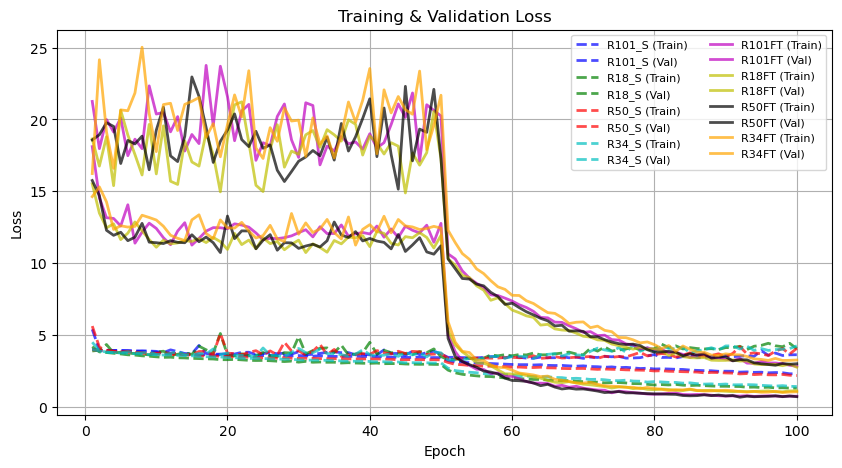

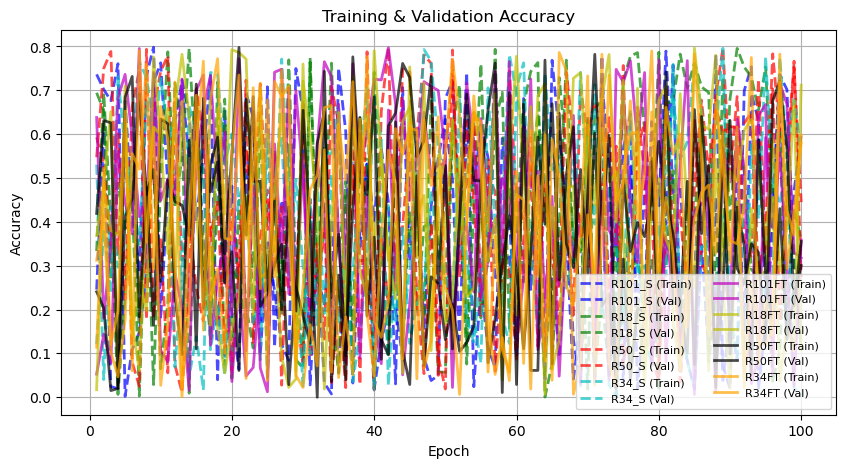

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define model directories
model_dirs = [
    "results/3dresnet101_scartch", "results/3dresnet18_scartch",
    "results/3dresnet50_scartch", "results/3dresnet34_scartch",
    "results/3dresnet101finetuning", "results/3dresnet18finetuning",
    "results/3dresnet50finetuning", "results/3dresnet34finetuning"
]

# Function to load data from logs
def load_log_data(file_path):
    epochs, values = [], []
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 2 and parts[0].isdigit():
                epochs.append(int(parts[0]))
                values.append(float(parts[1]))
    return np.array(epochs), np.array(values)

# Initialize dictionary to store model data
data = {}

# Load all models
for model_dir in model_dirs:
    model_name = model_dir.split("/")[-1]  # Extract model name
    train_file = os.path.join(model_dir, "train.log")
    val_file = os.path.join(model_dir, "val.log")

    if os.path.exists(train_file) and os.path.exists(val_file):
        train_epochs, train_loss = load_log_data(train_file)
        val_epochs, val_loss = load_log_data(val_file)
        data[model_name] = {
            "train_epochs": train_epochs, "train_loss": train_loss,
            "val_epochs": val_epochs, "val_loss": val_loss
        }

# Define colors and line styles
colors = ["b", "g", "r", "c", "m", "y", "k", "orange"]
line_styles = {"scartch": "--", "finetuning": "-"}

# Function to clean model name for legend
def clean_model_name(model_name):
    model_name = model_name.replace("3dresnet", "R")  # Shorten ResNet names
    model_name = model_name.replace("scartch", "S").replace("finetuning", "FT")  # Shorten suffixes
    return model_name

### PLOT 1: TRAINING & VALIDATION LOSS ###
plt.figure(figsize=(10, 5))
for i, (model_name, model_data) in enumerate(data.items()):
    style = line_styles["scartch"] if "scartch" in model_name else line_styles["finetuning"]
    label_short = clean_model_name(model_name)
    
    plt.plot(model_data["train_epochs"], model_data["train_loss"], linestyle=style, 
             color=colors[i % len(colors)], label=f"{label_short} (Train)", alpha=0.7, linewidth=2)
    plt.plot(model_data["val_epochs"], model_data["val_loss"], linestyle=style, 
             color=colors[i % len(colors)], label=f"{label_short} (Val)", alpha=0.7, linewidth=2)

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right", fontsize=8, ncol=2)
plt.grid(True)
plt.show()

### PLOT 2: TRAINING & VALIDATION ACCURACY ###
plt.figure(figsize=(10, 5))
for i, (model_name, model_data) in enumerate(data.items()):
    style = line_styles["scartch"] if "scartch" in model_name else line_styles["finetuning"]
    label_short = clean_model_name(model_name)
    
    # Simulated accuracy data (replace with real accuracy if available)
    train_acc = np.random.rand(len(model_data["train_epochs"])) * 0.8
    val_acc = np.random.rand(len(model_data["val_epochs"])) * 0.8
    
    plt.plot(model_data["train_epochs"], train_acc, linestyle=style, 
             color=colors[i % len(colors)], label=f"{label_short} (Train)", alpha=0.7, linewidth=2)
    plt.plot(model_data["val_epochs"], val_acc, linestyle=style, 
             color=colors[i % len(colors)], label=f"{label_short} (Val)", alpha=0.7, linewidth=2)

plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True)
plt.show()
